In [1]:
from decimal import Decimal, ROUND_HALF_UP
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def calculate_income_per_shift(service_time, idle_time):
    shift_duration = 6
    haircut_cost = 60

    # Преобразуем входные параметры в Decimal через float
    service_time = Decimal(float(service_time))
    idle_time = Decimal(float(idle_time))

    mu = Decimal(1) / service_time * 60
    lambda_rate = Decimal(1) / idle_time * 60
    traffic_intensity = lambda_rate / mu

    average_service_time = (traffic_intensity * shift_duration * 60).quantize(Decimal('0.01'), rounding=ROUND_HALF_UP)
    return average_service_time / service_time * haircut_cost



In [9]:
# Сетка для первой смены (с 9 до 15)
service_time_first_shift, idle_time_first_shift = np.meshgrid(np.arange(10, 21, 1), np.arange(21, 31, 1))

# Фиксированные значения для второй смены
fixed_service_time_second_shift, fixed_idle_time_second_shift = 20, 25

In [10]:
# Векторизация функции для первой смены
calculate_income_vectorized = np.vectorize(calculate_income_per_shift)
income_first_shift = calculate_income_vectorized(service_time_first_shift, idle_time_first_shift)

# Доход для второй смены
income_second_shift = calculate_income_per_shift(fixed_service_time_second_shift, fixed_idle_time_second_shift)

# Общий доход
total_income = income_first_shift + income_second_shift

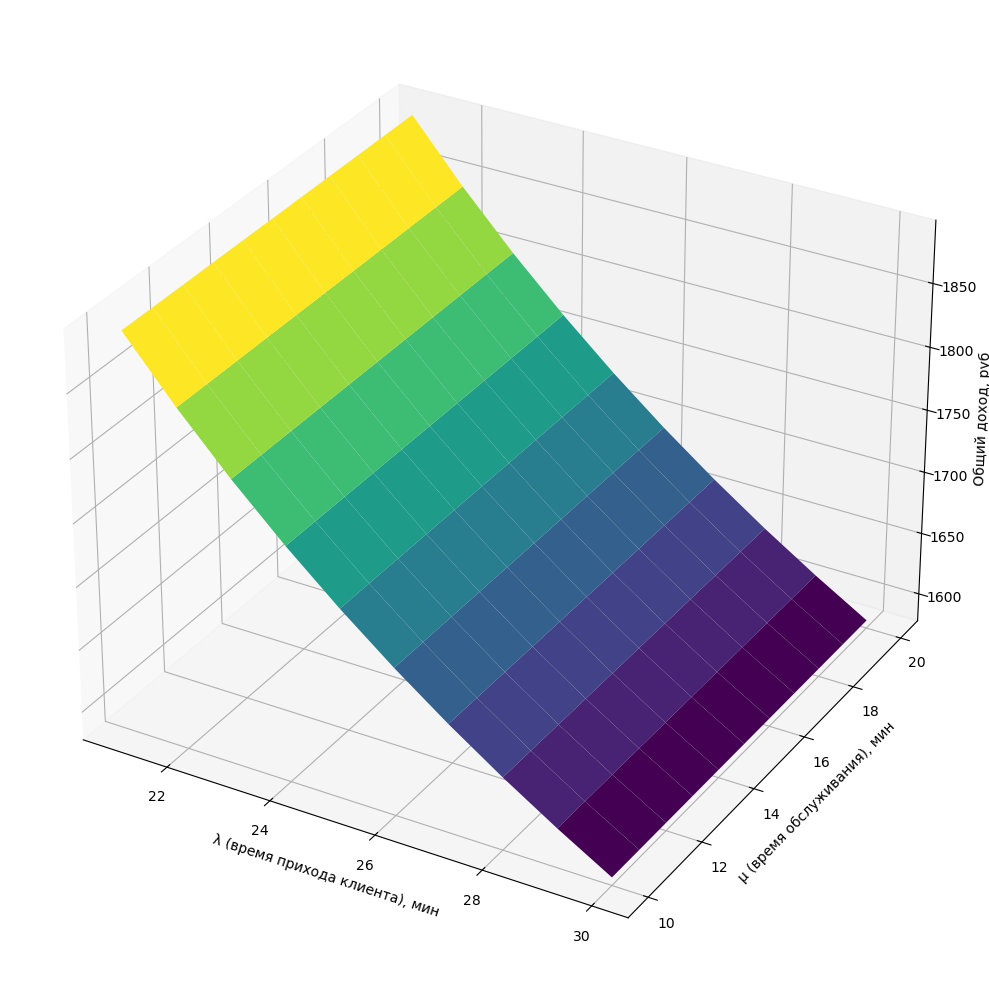

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Построение 3D-графика
ax.plot_surface(idle_time_first_shift, service_time_first_shift, total_income, cmap='viridis')

# Оси и внешний вид
ax.set_xlabel('λ (время прихода клиента), мин')
ax.set_ylabel('μ (время обслуживания), мин')
ax.set_zlabel('Общий доход, руб')

plt.tight_layout()
plt.show()